# Amazon Fine Food Review

Dataset link: https://www.kaggle.com/snap/amazon-fine-food-reviews

## Context

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

**Data includes:**

* Reviews from Oct 1999 - Oct 2012
* 568,454 reviews
* 256,059 users
* 74,258 products
* 260 users with > 50 reviews

## Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

## Importing the dataset

In [2]:
data=pd.read_csv("Reviews.csv")

In [3]:
# description of data
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [4]:
# number of rows and columns
data.shape

(568454, 10)

In [5]:
# names of the columns
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
# top 5 elements of the dataset
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
# 5 values from the end
data.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [8]:
# counting the count of unique scores in the dataset
data["Score"].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

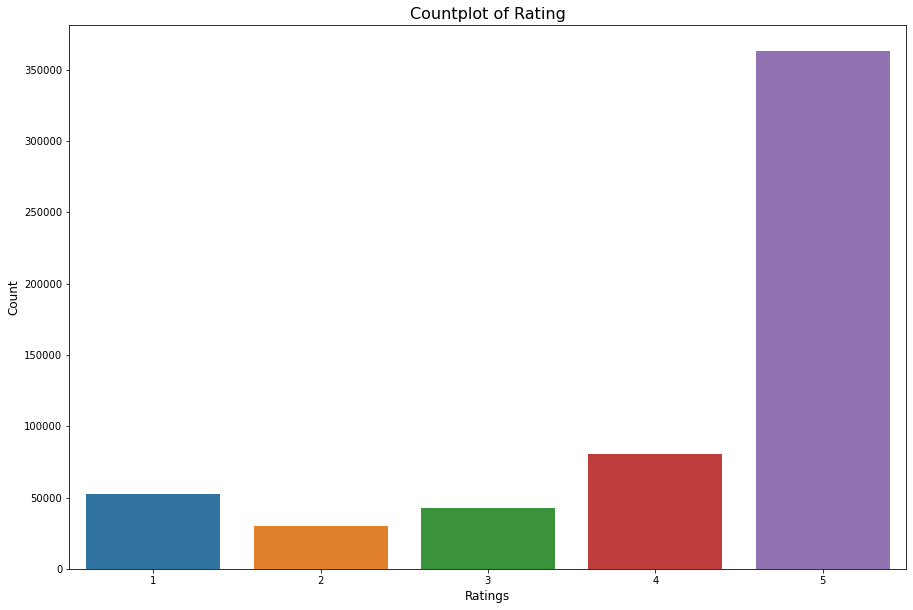

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['Score'],data=data)
plt.title('Countplot of Rating',fontsize=16)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.savefig('./img/countplotRating.jpg')
plt.show()

From the above results we can conclude that the dataset is not balanced. As there are is not equal distribution of each score points.

As we can see that, Scores 5 and 4 can clearly be termed as positive and Scores like 1 and 2 can clearly be classified as negative. But when it comes to Score of 3 its mixed. It can fall in positive category or it can fall in negative. So we are considering score value of 3 to be neutral and not taking it into consideration.

In [10]:
data=data[data["Score"]!=3]

In [11]:
# counting the values of score
data["Score"].value_counts()

5    363122
4     80655
1     52268
2     29769
Name: Score, dtype: int64

In [12]:
# converting al the scores to positive and negative
def change_score(x):
    if x>3:
        return 'positive'
    return 'negative'


data["Score"]=data["Score"].map(change_score)
data["Score"].value_counts()

positive    443777
negative     82037
Name: Score, dtype: int64

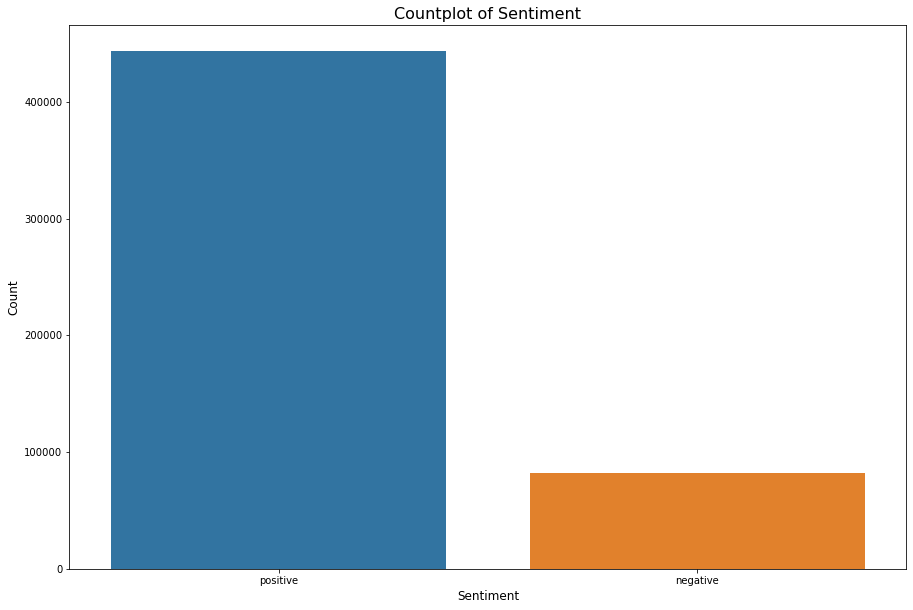

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['Score'],data=data)
plt.title('Countplot of Sentiment',fontsize=16)
plt.xlabel('Sentiment',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.savefig('./img/countplotSentiment1.jpg')
plt.show()

## Processing the Data

### Cleaning the Data

In [14]:
# removing duplications in the dataset

data=data.sort_values("ProductId",axis=0,ascending=True)
data=data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace=False)
data.shape

(364173, 10)

In [15]:
# helpfulness numerator will always be <= helfulness denominator

data=data[data.HelpfulnessNumerator<=data.HelpfulnessDenominator]
data.shape

(364171, 10)

In [16]:
# taking the necessary data from the dataset

data=data[["Score","Text"]]
data.shape

(364171, 2)

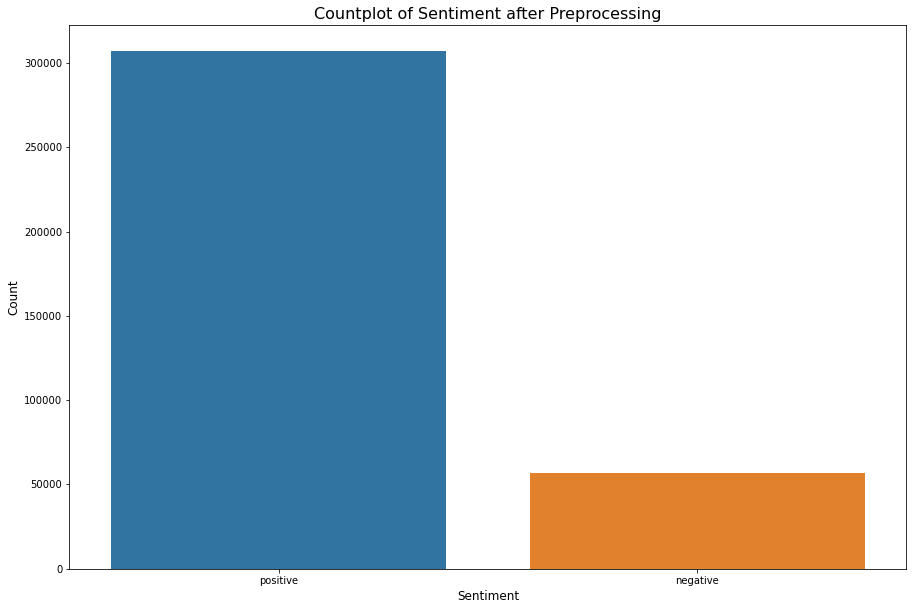

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['Score'],data=data)
plt.title('Countplot of Sentiment after Preprocessing',fontsize=16)
plt.xlabel('Sentiment',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.savefig('./img/countplotSentiment2.jpg')
plt.show()

In [18]:
# top 5 elements of the dataset
data.head()

,Score,Text
150523,positive,this witty little book makes my son laugh at l...
150505,positive,"I grew up reading these Sendak books, and watc..."
150506,positive,This is a fun way for children to learn their ...
150507,positive,This is a great little book to read aloud- it ...
150508,positive,This is a book of poetry about the months of t...


In [20]:
data.to_csv('preprocessed.csv',index=False)